In [ ]:
# HYPOTHESIS TESTING
# TODO: Visualization

In [ ]:
# Hypothesis 1: 
# Overall, there are more male than female authors who publish in the area of computer science. 

# Hypothesis 2: 
# In total, more has been written by men than by women.

In [1]:
import pandas

print("Importing names... ")
names = pandas.read_csv("data/names_cat_i3.csv", usecols=["name", "n_publs", "likely_gender", "score"])

# Setting index & accessing cells: https://pythonhow.com/accessing-dataframe-columns-rows-and-cells/
names = names.set_index("name", drop = False)
print("Names imported. They look like this: {}".format(names[:5]))

Importing names... 
Names imported. They look like this:                                         name likely_gender  n_publs  score
name                                                                      
'Maseka Lesaoana            'Maseka Lesaoana        female        2      8
(David) Jing Dai            (David) Jing Dai          male        1      7
(Max) Zong-Ming Cheng  (Max) Zong-Ming Cheng          male        2      8
(Sophy) Shu-Jiun Chen  (Sophy) Shu-Jiun Chen        female        2      7
(Zhou) Bryan Bai            (Zhou) Bryan Bai          male        2      6


In [4]:
# >>> Preparation
# Import stats to visualize
import pandas

print("Importing names... ")
stats = pandas.read_csv("data/stats_authors_contribs_by_gender_cor1.csv")

# Rename column: https://stackoverflow.com/questions/19758364/rename-specific-columns-in-pandas
stats.rename(columns={'Unnamed: 0':'prop'}, inplace=True)
stats = stats.set_index("prop", drop = False)

print("Stats imported. They look like this: {}".format(stats))

Importing names... 
Stats imported. They look like this:                                     prop             1
prop                                                  
n_authors_f_cor          n_authors_f_cor  9.611025e+05
n_authors_f_min          n_authors_f_min  1.441980e+05
n_authors_m_cor          n_authors_m_cor  1.345316e+06
n_authors_m_min          n_authors_m_min  1.112117e+06
n_authors_u_max          n_authors_u_max  1.050103e+06
n_contribs_f_max        n_contribs_f_max  1.995975e+05
n_contribs_f_max_v2  n_contribs_f_max_v2  5.932080e+05
n_contribs_m_max        n_contribs_m_max  2.490484e+06
n_contribs_m_max_v2  n_contribs_m_max_v2  7.120339e+06
n_contribs_u_min        n_contribs_u_min  1.786655e+06
n_contribs_u_min_v2  n_contribs_u_min_v2  5.640198e+06


In [5]:
# >>> Testing
# Calculate statistics
n_authors_f_min = stats.at["n_authors_f_min", "1"]
n_authors_m_min = stats.at["n_authors_m_min", "1"]
n_authors_u_max = stats.at["n_authors_u_max", "1"]

In [6]:
# Chi Square Test for distribution
from scipy.stats import chisquare
total = n_authors_f_min + n_authors_m_min
exp_m = total / 2
exp_f = total / 2
chisquare([n_authors_f_min, n_authors_m_min], f_exp=[exp_f, exp_m])

In [20]:
# >>> Visualization
# Preparation


import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

mpl.rcParams['pgf.rcfonts'] = False
mpl.rcParams['font.size'] = 11.0

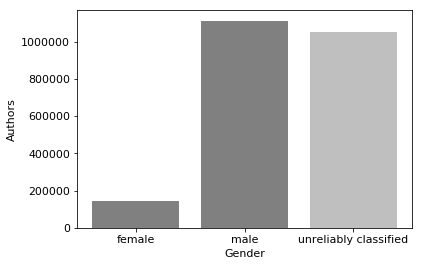

In [22]:
# H1 - if all unclassified were women

plt.bar(["female", "male"], [n_authors_f_min, n_authors_m_min], color="grey")
plt.bar(["unreliably classified"], [n_authors_u_max], alpha=0.5, color="grey")
plt.xlabel("Gender")
plt.ylabel("Authors")
plt.savefig('graphs/h1/authors_by_gender_2.pdf')
plt.savefig('graphs/h1/authors_by_gender_2.pgf')

In [ ]:
# >>> Evaluation
# Hypothesis 1 and 2 are correct. 
# Overall, there are more male than female authors. In total, more has been written by men than by women.